In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [5]:
img=image.load_img('./Training/happy/me.jpg')

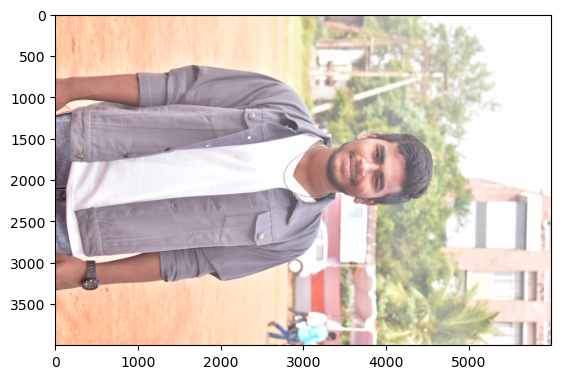

In [6]:
plt.imshow(img)

In [8]:
cv2.imread('./Training/happy/me.jpg').shape

(6000, 4000, 3)

In [29]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [30]:
train_dataset=train.flow_from_directory('./Training',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('./Validation',target_size=(200,200),batch_size=3,class_mode='binary')

Found 12 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [31]:
train_dataset.class_indices

{'happy': 0, 'not-happy': 1}

In [32]:
#neural networks cannot take string type of things as predictions, so it converts all classes inside dataset into numeric values
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [33]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [34]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [35]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=30,validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 21s 8s/step - loss: 5.3359 - accuracy: 0.7778 - val_loss: 23.7311 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 16s 7s/step - loss: 6.8965 - accuracy: 0.5556 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 17s 7s/step - loss: 0.7791 - accuracy: 0.7778 - val_loss: 5.7358 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 16s 6s/step - loss: 3.3291 - accuracy: 0.3333 - val_loss: 1.9946 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 17s 7s/step - loss: 1.8335 - accuracy: 0.5556 - val_loss: 0.2985 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 16s 7s/step - loss: 1.0206 - accuracy: 0.6667 - val_loss: 0.3373 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 15s 7s/step - loss: 0.2725 - accuracy: 0.8889 - val_loss: 0.2158 - val_accuracy: 1.0000
Epoch 8/30
3/3 [=================

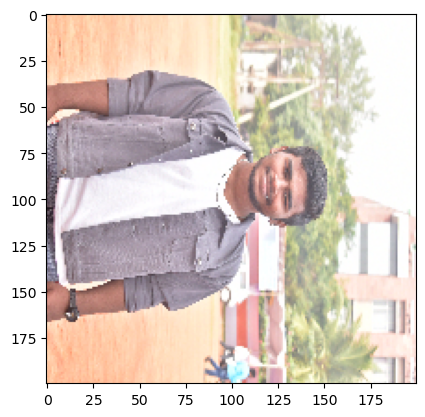

1/1 [==============================] - 0s 127ms/step
you are happy


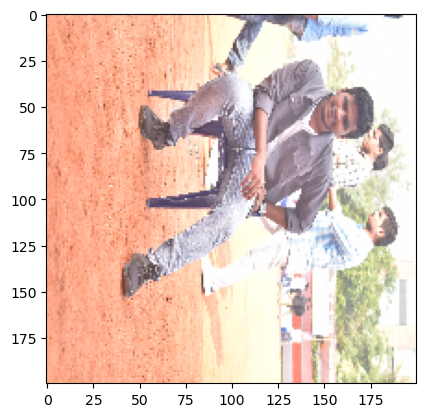

1/1 [==============================] - 0s 126ms/step
you are not happy


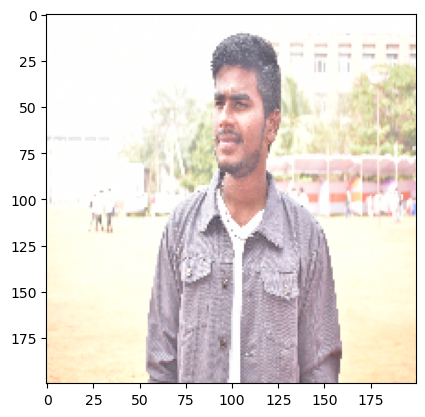

1/1 [==============================] - 0s 117ms/step
you are not happy


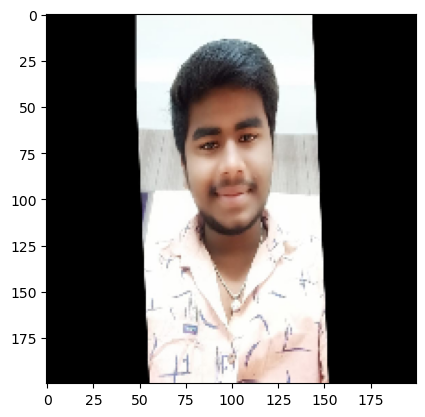

1/1 [==============================] - 0s 124ms/step
you are happy


In [39]:
 dir_path='./Testing'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show(img)
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("you are happy")
    else:
        print("you are not happy")